In [3]:
pip install inspyred #Instalamos la librería inspyred y después la importamos junto con el resto de librerarías que vamos a usar 

     |████████████████████████████████| 74 kB 1.2 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [358]:
import inspyred
import numpy as np
import random
from scipy.stats import wilcoxon
import time

# Primer paso: representación de la solución.

In [224]:
# Vamos a representar la solución del problema. Es un vector con 4 variables: x1, x2, x3 y x4 por tanto
# cada individuo de la población es una lista de cuatro elementos. 


def generate_solution(random, args):
    
    x1 = random.uniform(0, 1200)
    x2 = random.uniform(0.001, 1200)  # x2 debe ser mayor que 0
    x3 = random.uniform(-0.55, 0.55)
    x4 = random.uniform(-0.55, 0.55)
    
    candidates = [x1, x2, x3, x4]
    
    return candidates

# Cada variable es una lista de numeros aleatorios dentro de los límites que me da el problema


# Segundo paso: definir la función fitness.

In [225]:
# Nuestra función de fitness penalizará las soluciones que no cumplan las restricciones

def func_fitness (candidates, args):
    
    fitness = []
    
    for individuo in candidates:
        
        x1_c = individuo[0]
        x2_c = individuo[1]
        x3_c = individuo[2]
        x4_c = individuo[3]
    
        # Función objetivo a minimizar:
    
        objective = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)

        # Restricciones:
    
        g1 = -x4_c + x3_c - 0.55 # Esta debe ser menor o igual que 0
        g2 = -x3_c + x4_c - 0.55 # Esta también, por eso no ponemos luego valor absoluto
    
        h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
        h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c
        h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

        # Penalizaciones por no cumplir con las restricciones
    
        penalty = max(0, g1) + max(0, g2) + max(0, abs(h1)) + max(0, abs(h2)) + max(0, abs(h3))

        # Función de fitness
    
        fitness_value = objective + penalty
        
        fitness.append(fitness_value)
    
    return fitness

# La función max(0, g1) retorna el máximo entre 0 y g1. Entonces, si g1 es negativo o cero, el máximo entre 0 y 
# g1 será 0. Si g1 es positivo, el máximo será g1. 
# La lógica de la penalización es que si la restricción se cumple, no hay penalización (la penalización es 0). 
# Si la restricción se viola, la penalización reflejará la magnitud de la violación.

# Ahora empieza nuestro algoritmo de evolución genética

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        100 9044.91702 1702.51946 5290.94263 5284.36652 1775.05651

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        200 7893.08451 1833.03979 3665.86719 4039.95730 1345.39218

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        300 5916.64072 1685.54304 3005.06323 3242.06825 852.834547

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        400 5012.69007 1639.20759 2666.33925 2791.99013 639.016853

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        38       3900 2856.05687 1601.84673 1604.35576 1623.37079 140.534297

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        39       4000 2340.93595 1601.84673 1603.93084 1615.91000 85.1285847

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        40       4100 2862.59031 1600.42161 1603.61859 1635.22914 186.984133

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        41       4200 2268.73786 1600.38653 1603.02024 1609.90418 66.2425976

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        75       7600 2266.64903 1600.03942 1600.03999 1607.42504 66.5959941

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        76       7700 2019.82083 1600.03929 1600.03982 1607.05871 50.0874734

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        77       7800 2266.64890 1600.03929 1600.03972 1613.37499 93.3248424

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        78       7900 2822.41747 1600.03928 1600.03951 1612.26335 121.625065

Generation Evaluation      Worst       Best     Median    Average    Std

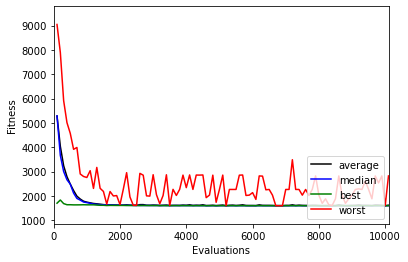

In [300]:
# Primera prueba:

# Hiperparámetros: seed = 123456789 N = 100 Crossover_rate = 0.6 [0.6, 0.9] Mutation_rate = 0.01

# Creamos un generador de números aleatorios y definimos una semilla.

rng = random.Random()
rng.seed(123456789)

# Definimos los operadores del algoritmo genético

ea = inspyred.ec.GA(rng)

ea.selector = inspyred.ec.selectors.tournament_selection # Selección por torneo

ea.variator = [inspyred.ec.variators.simulated_binary_crossover, # Cruce SBX
               inspyred.ec.variators.gaussian_mutation] # Mutación gausiana

ea.replacer = inspyred.ec.replacers.generational_replacement # Reemplazo generacional estricto

ea.terminator = inspyred.ec.terminators.generation_termination # Terminamos al llegar a 100 generaciones

ea.observer = [inspyred.ec.observers.stats_observer, # Nos devuelve las estadísticas por generación
               inspyred.ec.observers.plot_observer] # Muestra una gráfica de la evolución del fitness por generación

# Evolucionamos nuestra población

final_pop = ea.evolve(generator = generate_solution,
                      evaluator = func_fitness,
                      num_inputs = 4,
                      pop_size = 100,
                      maximize = False,
                      bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                      tournament_size = 2,
                      max_generations = 100,
                      crossover_rate = 0.6,
                      mutation_rate = 0.01) 

# Ordenamos la población final y mostramos por pantalla la mejor solución y su valor de fitness

final_pop.sort(key = lambda x: x.fitness)
best_solution = final_pop[0].candidate
best_fitness = final_pop[0].fitness
print(f'Mejor Solución: {best_solution}, Valor Objetivo: {best_fitness}')

# Calculamos el valor de las reestricciones de nuestra mejor solución.

x1_c = final_pop[0].candidate[0]
x2_c = final_pop[0].candidate[1]
x3_c = final_pop[0].candidate[2]
x4_c = final_pop[0].candidate[3]
    
g1 = -x4_c + x3_c - 0.55 
g2 = -x3_c + x4_c - 0.55 
h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c    
h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

# Las mostramos por pantalla también

constraints_value = [g1, g2, h1, h2, h3]
print(f'Valor de las reestricciones: {constraints_value}')

# Calculamos el valor de la función para esa solución 

f_best_solution = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)
print(f'Valor de la función para la mejor solución: {f_best_solution}')



Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        100 9044.91702 1702.51946 5290.94263 5284.36652 1775.05651

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        200 9374.31083 1770.41028 4007.85466 4263.88304 1574.60912

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        300 6944.12517 1934.35065 3226.17624 3551.61168 1127.39723

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        400 5994.04852 1773.73989 2891.60152 3045.79900 807.472795

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        36       3700 1779.18797 1605.56689 1606.85607 1608.77402 17.1425391

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        37       3800 1866.82631 1605.71774 1606.69952 1612.74234 35.0833529

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        38       3900 2650.41227 1605.65786 1606.44576 1619.66554 107.200322

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        39       4000 2643.87655 1605.60066 1606.20863 1628.77453 133.254671

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        75       7600 1610.25721 1601.26229 1602.70190 1602.57359 1.05814441

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        76       7700 2732.91101 1601.22919 1602.66470 1613.52890 112.504579

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        77       7800 2733.65305 1601.22919 1601.33666 1619.02131 126.014155

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        78       7900 2269.24671 1601.22998 1601.30627 1622.62235 102.848155

Generation Evaluation      Worst       Best     Median    Average    Std

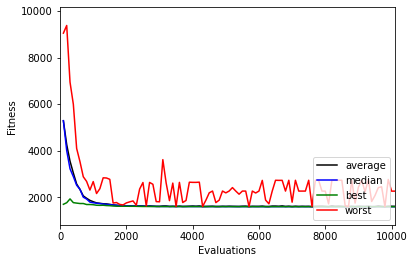

In [301]:
# Segunda prueba: selección por rank 

# Hiperparámetros: seed = 123456789 N = 100 Crossover_rate = 0.6 [0.6, 0.9] Mutation_rate = 0.01

# Creamos un generador de números aleatorios y definimos una semilla.

rng = random.Random()
rng.seed(123456789)

# Definimos los operadores del algoritmo genético

ea = inspyred.ec.GA(rng)

ea.selector = inspyred.ec.selectors.rank_selection # Selección por rank (selecciona 1 por defecto)

ea.variator = [inspyred.ec.variators.simulated_binary_crossover, # Cruce SBX
               inspyred.ec.variators.gaussian_mutation] # Mutación gausiana

ea.replacer = inspyred.ec.replacers.generational_replacement # Reemplazo generacional estricto

ea.terminator = inspyred.ec.terminators.generation_termination # Terminamos al llegar a 100 generaciones

ea.observer = [inspyred.ec.observers.stats_observer, # Nos devuelve las estadísticas por generación
               inspyred.ec.observers.plot_observer] # Muestra una gráfica de la evolución del fitness por generación

# Evolucionamos nuestra población

final_pop = ea.evolve(generator = generate_solution,
                      evaluator = func_fitness,
                      num_inputs = 4,
                      pop_size = 100,
                      maximize = False,
                      bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                      max_generations = 100,
                      crossover_rate = 0.6,
                      mutation_rate = 0.01) 

# Ordenamos la población final y mostramos por pantalla la mejor solución y su valor de fitness

final_pop.sort(key = lambda x: x.fitness)
best_solution = final_pop[0].candidate
best_fitness = final_pop[0].fitness
print(f'Mejor Solución: {best_solution}, Valor Objetivo: {best_fitness}')

# Calculamos el valor de las reestricciones de nuestra mejor solución.

x1_c = final_pop[0].candidate[0]
x2_c = final_pop[0].candidate[1]
x3_c = final_pop[0].candidate[2]
x4_c = final_pop[0].candidate[3]
    
g1 = -x4_c + x3_c - 0.55 
g2 = -x3_c + x4_c - 0.55 
h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c    
h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

# Las mostramos por pantalla también

constraints_value = [g1, g2, h1, h2, h3]
print(f'Valor de las reestricciones: {constraints_value}')

# Calculamos el valor de la función para esa solución 

f_best_solution = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)
print(f'Valor de la función para la mejor solución: {f_best_solution}')

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        100 9044.91702 1702.51946 5290.94263 5284.36652 1775.05651

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        200 9044.91702 1702.51946 3865.19399 4076.62951 1341.41427

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        300 5615.20071 1702.51946 3137.46822 3261.98986 701.074985

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        400 4090.41608 1702.51946 2729.44015 2761.90669 472.362688

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        37       3800 3167.88118 1930.46086 1933.55515 1945.84977 122.820039

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        38       3900 1933.82574 1931.53712 1933.42648 1933.30740 0.45057399

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        39       4000 1958.07615 1927.90654 1933.30084 1933.35007 2.57943604

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        40       4100 2192.89774 1927.90654 1933.13893 1941.21586 44.5389690

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        75       7600 2819.88042 1922.44142 1923.00788 1931.96754 89.2387343

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        76       7700 2935.98793 1921.30219 1922.97437 1939.34213 118.083849

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        77       7800 2936.13129 1922.40820 1922.94055 1949.29771 147.299480

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        78       7900 2935.93335 1922.40820 1922.88940 1942.47999 111.637990

Generation Evaluation      Worst       Best     Median    Average    Std

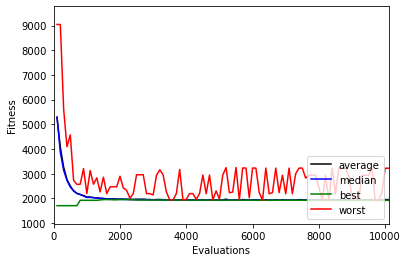

In [302]:
# Tercera prueba: selección por rank y cruce aritmético

# Hiperparámetros: seed = 123456789 N = 100 Crossover_rate = 0.6 [0.6, 0.9] Mutation_rate = 0.01

# Creamos un generador de números aleatorios y definimos una semilla.

rng = random.Random()
rng.seed(123456789)

# Definimos los operadores del algoritmo genético

ea = inspyred.ec.GA(rng)

ea.selector = inspyred.ec.selectors.rank_selection # Selección por rank

ea.variator = [inspyred.ec.variators.arithmetic_crossover, # Cruce aritmético
               inspyred.ec.variators.gaussian_mutation] # Mutación gausiana

ea.replacer = inspyred.ec.replacers.generational_replacement # Reemplazo generacional estricto

ea.terminator = inspyred.ec.terminators.generation_termination # Terminamos al llegar a 100 generaciones

ea.observer = [inspyred.ec.observers.stats_observer, # Nos devuelve las estadísticas por generación
               inspyred.ec.observers.plot_observer] # Muestra una gráfica de la evolución del fitness por generación

# Evolucionamos nuestra población

final_pop = ea.evolve(generator = generate_solution,
                      evaluator = func_fitness,
                      num_inputs = 4,
                      pop_size = 100,
                      maximize = False,
                      bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                      max_generations = 100,
                      crossover_rate = 0.6,
                      mutation_rate = 0.01) 

# Ordenamos la población final y mostramos por pantalla la mejor solución y su valor de fitness

final_pop.sort(key = lambda x: x.fitness)
best_solution = final_pop[0].candidate
best_fitness = final_pop[0].fitness
print(f'Mejor Solución: {best_solution}, Valor Objetivo: {best_fitness}')

# Calculamos el valor de las reestricciones de nuestra mejor solución.

x1_c = final_pop[0].candidate[0]
x2_c = final_pop[0].candidate[1]
x3_c = final_pop[0].candidate[2]
x4_c = final_pop[0].candidate[3]
    
g1 = -x4_c + x3_c - 0.55 
g2 = -x3_c + x4_c - 0.55 
h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c    
h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

# Las mostramos por pantalla también

constraints_value = [g1, g2, h1, h2, h3]
print(f'Valor de las reestricciones: {constraints_value}')

# Calculamos el valor de la función para esa solución 

f_best_solution = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)
print(f'Valor de la función para la mejor solución: {f_best_solution}')

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        100 9044.91702 1702.51946 5290.94263 5284.36652 1775.05651

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        200 10929.8493 1822.05527 4565.16795 4878.60373 1974.12377

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        300 8255.55234 1785.64287 4095.34968 4387.79883 1690.36841

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        400 10126.3484 1837.24278 4442.52506 4627.75150 2034.81488

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        38       3900 10554.6579 1805.37153 3696.74309 4059.28805 1688.00407

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        39       4000 9796.59371 1804.86348 4069.87142 4324.36449 1864.68945

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        40       4100 8473.35762 1833.05080 3416.44946 3766.92229 1544.92717

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        41       4200 8786.27500 1741.31655 3691.80257 4072.87531 1541.66365

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        77       7800 6063.53754 2042.94430 2755.77043 2947.13042 756.328442

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        78       7900 5117.76968 1907.67734 2753.69867 2936.45087 711.310638

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        79       8000 5170.68442 1993.48140 2676.55382 2904.36106 750.721266

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        80       8100 5310.71075 1881.00695 2757.16851 2955.71964 773.257117

Generation Evaluation      Worst       Best     Median    Average    Std

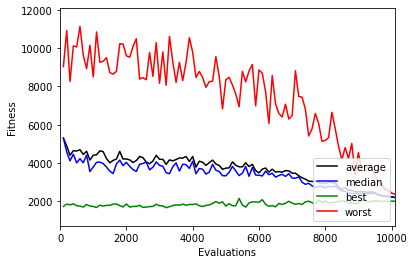

In [317]:
# Cuarta prueba: selección por torneo, cruce aritmético y mutación no uniforme

# Hiperparámetros: seed = 123456789 N = 100 Crossover_rate = 0.6 [0.6, 0.9] Mutation_rate = 0.01

# Creamos un generador de números aleatorios y definimos una semilla.

rng = random.Random()
rng.seed(123456789)

# Definimos los operadores del algoritmo genético

ea = inspyred.ec.GA(rng)

ea.selector = inspyred.ec.selectors.tournament_selection # Selección por torneo

ea.variator = [inspyred.ec.variators.arithmetic_crossover, # Cruce aritmético
               inspyred.ec.variators.nonuniform_mutation] # Mutación no uniforme

ea.replacer = inspyred.ec.replacers.generational_replacement # Reemplazo generacional estricto

ea.terminator = inspyred.ec.terminators.generation_termination # Terminamos al llegar a 100 generaciones

ea.observer = [inspyred.ec.observers.stats_observer, # Nos devuelve las estadísticas por generación
               inspyred.ec.observers.plot_observer] # Muestra una gráfica de la evolución del fitness por generación

# Evolucionamos nuestra población

final_pop = ea.evolve(generator = generate_solution,
                      evaluator = func_fitness,
                      num_inputs = 4,
                      pop_size = 100,
                      maximize = False,
                      bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                      tournament_size = 2,
                      max_generations = 100,
                      crossover_rate = 0.6,
                      mutation_rate = 0.01) 

# Ordenamos la población final y mostramos por pantalla la mejor solución y su valor de fitness

final_pop.sort(key = lambda x: x.fitness)
best_solution = final_pop[0].candidate
best_fitness = final_pop[0].fitness
print(f'Mejor Solución: {best_solution}, Valor Objetivo: {best_fitness}')

# Calculamos el valor de las reestricciones de nuestra mejor solución.

x1_c = final_pop[0].candidate[0]
x2_c = final_pop[0].candidate[1]
x3_c = final_pop[0].candidate[2]
x4_c = final_pop[0].candidate[3]
    
g1 = -x4_c + x3_c - 0.55 
g2 = -x3_c + x4_c - 0.55 
h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c    
h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

# Las mostramos por pantalla también

constraints_value = [g1, g2, h1, h2, h3]
print(f'Valor de las reestricciones: {constraints_value}')

# Calculamos el valor de la función para esa solución 

f_best_solution = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)
print(f'Valor de la función para la mejor solución: {f_best_solution}')

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        100 9044.91702 1702.51946 5290.94263 5284.36652 1775.05651

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        200 10062.7700 1725.14301 4617.87061 4936.83049 2109.38884

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        300 9711.77905 1640.71202 4439.17334 4833.68173 2081.92063

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        400 9414.66536 1766.63111 4813.37817 5002.46645 2005.45088

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        42       4300 8418.23485 1759.79041 3317.38836 3744.41629 1455.83989

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        43       4400 7822.80487 1793.16495 3878.49808 4067.70445 1410.97825

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        44       4500 8532.70647 1686.78122 3317.67656 3727.04485 1509.14485

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        45       4600 7757.33098 1694.96024 3195.45011 3598.85576 1340.72217

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        80       8100 5478.29784 1739.20930 2573.14455 2808.48865 911.614225

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        81       8200 5619.46272 1704.52169 2399.06824 2609.68396 742.653656

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        82       8300 5286.89296 1747.34589 2358.76910 2530.85129 647.390938

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        83       8400 4869.62110 1639.48573 2277.63810 2506.49275 688.611864

Generation Evaluation      Worst       Best     Median    Average    Std

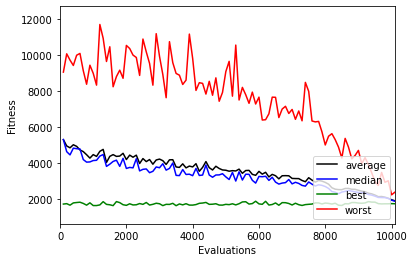

In [318]:
# Quinta prueba: selección por torneo, cruce sbx y mutación no uniforme

# Hiperparámetros: seed = 123456789 N = 100 Crossover_rate = 0.6 [0.6, 0.9] Mutation_rate = 0.01

# Creamos un generador de números aleatorios y definimos una semilla.

rng = random.Random()
rng.seed(123456789)

# Definimos los operadores del algoritmo genético

ea = inspyred.ec.GA(rng)

ea.selector = inspyred.ec.selectors.tournament_selection # Selección por torneo

ea.variator = [inspyred.ec.variators.simulated_binary_crossover, # Cruce sbx
               inspyred.ec.variators.nonuniform_mutation] # Mutación no uniforme

ea.replacer = inspyred.ec.replacers.generational_replacement # Reemplazo generacional estricto

ea.terminator = inspyred.ec.terminators.generation_termination # Terminamos al llegar a 100 generaciones

ea.observer = [inspyred.ec.observers.stats_observer, # Nos devuelve las estadísticas por generación
               inspyred.ec.observers.plot_observer] # Muestra una gráfica de la evolución del fitness por generación

# Evolucionamos nuestra población

final_pop = ea.evolve(generator = generate_solution,
                      evaluator = func_fitness,
                      num_inputs = 4,
                      pop_size = 100,
                      maximize = False,
                      bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                      tournament_size = 2,
                      max_generations = 100,
                      crossover_rate = 0.6,
                      mutation_rate = 0.01) 

# Ordenamos la población final y mostramos por pantalla la mejor solución y su valor de fitness

final_pop.sort(key = lambda x: x.fitness)
best_solution = final_pop[0].candidate
best_fitness = final_pop[0].fitness
print(f'Mejor Solución: {best_solution}, Valor Objetivo: {best_fitness}')

# Calculamos el valor de las reestricciones de nuestra mejor solución.

x1_c = final_pop[0].candidate[0]
x2_c = final_pop[0].candidate[1]
x3_c = final_pop[0].candidate[2]
x4_c = final_pop[0].candidate[3]
    
g1 = -x4_c + x3_c - 0.55 
g2 = -x3_c + x4_c - 0.55 
h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c    
h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

# Las mostramos por pantalla también

constraints_value = [g1, g2, h1, h2, h3]
print(f'Valor de las reestricciones: {constraints_value}')

# Calculamos el valor de la función para esa solución 

f_best_solution = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)
print(f'Valor de la función para la mejor solución: {f_best_solution}')

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        100 9044.91702 1702.51946 5290.94263 5284.36652 1775.05651

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        200 8143.19583 1736.14476 3730.22323 4018.63749 1432.88562

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        300 5892.62695 1659.71680 3121.80806 3260.43569 891.905333

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        400 5192.88513 1682.73108 2768.87722 2840.44776 787.458142

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        37       3800 1601.56296 1600.39370 1600.68495 1600.70313 0.19167327

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        38       3900 1601.07012 1600.24480 1600.56339 1600.59304 0.14935912

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        39       4000 1982.25044 1600.21837 1600.47766 1604.32426 37.9832862

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        40       4100 1977.12394 1600.21661 1600.43230 1606.93546 46.0729574

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        75       7600 2024.31177 1600.02680 1600.02702 1605.21522 43.0853136

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        76       7700 2827.22123 1600.02679 1600.02698 1617.43642 129.018678

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        77       7800 2266.64447 1600.02679 1600.02692 1612.63318 88.1979690

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        78       7900 2266.64436 1600.02677 1600.02688 1609.13747 70.4151999

Generation Evaluation      Worst       Best     Median    Average    Std

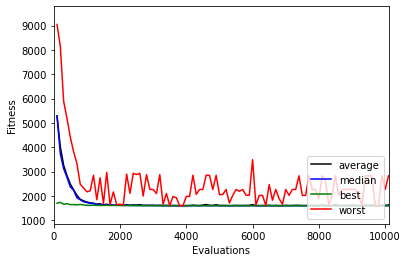

In [305]:
# Sexta prueba: selección por torneo, cruce sbx, mutación gausiana, reemplazo elitista

# Hiperparámetros: seed = 123456789 N = 100 Crossover_rate = 1 (por reemplazo elitista) Mutation_rate = 0.01

# Creamos un generador de números aleatorios y definimos una semilla.

rng = random.Random()
rng.seed(123456789)

# Definimos los operadores del algoritmo genético

ea = inspyred.ec.GA(rng)

ea.selector = inspyred.ec.selectors.tournament_selection # Selección por torneo

ea.variator = [inspyred.ec.variators.simulated_binary_crossover, # Cruce sbx
               inspyred.ec.variators.gaussian_mutation] # Mutación gausiana

ea.replacer = inspyred.ec.replacers.steady_state_replacement # Reemplazo elitista 

ea.terminator = inspyred.ec.terminators.generation_termination # Terminamos al llegar a 100 generaciones

ea.observer = [inspyred.ec.observers.stats_observer, # Nos devuelve las estadísticas por generación
               inspyred.ec.observers.plot_observer] # Muestra una gráfica de la evolución del fitness por generación

# Evolucionamos nuestra población

final_pop = ea.evolve(generator = generate_solution,
                      evaluator = func_fitness,
                      num_inputs = 4,
                      pop_size = 100,
                      maximize = False,
                      bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                      tournament_size = 2,
                      max_generations = 100,
                      crossover_rate = 1,
                      mutation_rate = 0.01,
                      num_elites = 1) 

# Ordenamos la población final y mostramos por pantalla la mejor solución y su valor de fitness

final_pop.sort(key = lambda x: x.fitness)
best_solution = final_pop[0].candidate
best_fitness = final_pop[0].fitness
print(f'Mejor Solución: {best_solution}, Valor Objetivo: {best_fitness}')

# Calculamos el valor de las reestricciones de nuestra mejor solución.

x1_c = final_pop[0].candidate[0]
x2_c = final_pop[0].candidate[1]
x3_c = final_pop[0].candidate[2]
x4_c = final_pop[0].candidate[3]
    
g1 = -x4_c + x3_c - 0.55 
g2 = -x3_c + x4_c - 0.55 
h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c    
h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

# Las mostramos por pantalla también

constraints_value = [g1, g2, h1, h2, h3]
print(f'Valor de las reestricciones: {constraints_value}')

# Calculamos el valor de la función para esa solución 

f_best_solution = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)
print(f'Valor de la función para la mejor solución: {f_best_solution}')

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0       1000 11745.6002 1702.51946 5294.08342 5421.13588 2010.30388

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1       2000 11433.1926 1667.31478 4101.47946 4343.31343 1561.01180

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2       3000 8505.91860 1669.68385 3385.12288 3564.29926 1165.15851

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3       4000 6975.00733 1682.15151 2909.72415 3053.05154 886.716385

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        37      38000 4280.23831 1600.05873 1601.43736 1725.78893 303.935043

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        38      39000 3471.64605 1600.05873 1601.21828 1712.08219 283.548217

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        39      40000 3503.64564 1600.06802 1600.97650 1706.06759 266.768070

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        40      41000 3613.70390 1600.06443 1600.83558 1714.21008 296.597024

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        74      75000 3593.08294 1600.02662 1600.13195 1714.48082 289.864782

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        75      76000 3492.91408 1600.02659 1600.12883 1734.61125 315.204303

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        76      77000 3613.57998 1600.02691 1600.14099 1731.92207 301.436858

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        77      78000 3488.14180 1600.02682 1600.13510 1743.43677 312.386978

Generation Evaluation      Worst       Best     Median    Average    Std

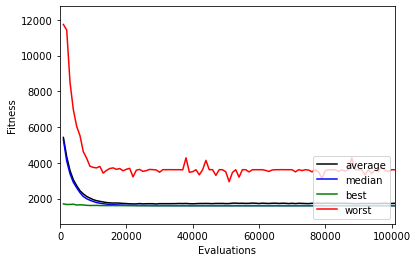

In [306]:
# Séptima prueba: selección por torneo, cruce sbx, mutación gausiana, reemplazo generacional

# Variamos Hiperparámetros: seed = 123456789 N = 1000 Crossover_rate = 0.9 Mutation_rate = 0.1

# Creamos un generador de números aleatorios y definimos una semilla.

rng = random.Random()
rng.seed(123456789)

# Definimos los operadores del algoritmo genético

ea = inspyred.ec.GA(rng)

ea.selector = inspyred.ec.selectors.tournament_selection # Selección por torneo

ea.variator = [inspyred.ec.variators.simulated_binary_crossover, # Cruce sbx
               inspyred.ec.variators.gaussian_mutation] # Mutación gausiana

ea.replacer = inspyred.ec.replacers.generational_replacement # Reemplazo generacional

ea.terminator = inspyred.ec.terminators.generation_termination # Terminamos al llegar a 100 generaciones

ea.observer = [inspyred.ec.observers.stats_observer, # Nos devuelve las estadísticas por generación
               inspyred.ec.observers.plot_observer] # Muestra una gráfica de la evolución del fitness por generación

# Evolucionamos nuestra población

final_pop = ea.evolve(generator = generate_solution,
                      evaluator = func_fitness,
                      num_inputs = 4,
                      pop_size = 1000,
                      maximize = False,
                      bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                      tournament_size = 2,
                      max_generations = 100,
                      crossover_rate = 0.9,
                      mutation_rate = 0.1) 

# Ordenamos la población final y mostramos por pantalla la mejor solución y su valor de fitness

final_pop.sort(key = lambda x: x.fitness)
best_solution = final_pop[0].candidate
best_fitness = final_pop[0].fitness
print(f'Mejor Solución: {best_solution}, Valor Objetivo: {best_fitness}')

# Calculamos el valor de las reestricciones de nuestra mejor solución.

x1_c = final_pop[0].candidate[0]
x2_c = final_pop[0].candidate[1]
x3_c = final_pop[0].candidate[2]
x4_c = final_pop[0].candidate[3]
    
g1 = -x4_c + x3_c - 0.55 
g2 = -x3_c + x4_c - 0.55 
h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c    
h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

# Las mostramos por pantalla también

constraints_value = [g1, g2, h1, h2, h3]
print(f'Valor de las reestricciones: {constraints_value}')

# Calculamos el valor de la función para esa solución 

f_best_solution = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)
print(f'Valor de la función para la mejor solución: {f_best_solution}')

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0       1000 11745.6002 1702.51946 5294.08342 5421.13588 2010.30388

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1       2000 11433.1926 1667.31478 4101.47946 4343.31343 1561.01180

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2       3000 8505.91860 1669.68385 3385.12288 3564.29926 1165.15851

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3       4000 6975.00733 1682.15151 2909.72415 3053.05154 886.716385

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        37      38000 4280.23831 1600.05873 1601.43736 1725.78893 303.935043

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        38      39000 3471.64605 1600.05873 1601.21828 1712.08219 283.548217

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        39      40000 3503.64564 1600.06802 1600.97650 1706.06759 266.768070

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        40      41000 3613.70390 1600.06443 1600.83558 1714.21008 296.597024

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        76      77000 3613.57998 1600.02691 1600.14099 1731.92207 301.436858

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        77      78000 3488.14180 1600.02682 1600.13510 1743.43677 312.386978

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        78      79000 3113.86646 1600.02652 1600.14877 1726.57530 279.275689

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        79      80000 3560.01615 1600.02670 1600.16101 1744.06778 317.701350

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       115     116000 3614.92492 1600.02641 1600.23416 1746.83749 321.555985

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       116     117000 3493.25748 1600.02640 1600.16919 1742.47399 320.532169

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       117     118000 3492.44931 1600.02640 1600.13705 1731.06142 302.553761

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       118     119000 3614.00202 1600.02641 1600.19917 1729.71565 298.964223

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       152     153000 3613.54111 1600.02645 1600.09389 1726.94196 309.075947

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       153     154000 3613.52655 1600.02645 1600.13025 1722.19803 285.126898

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       154     155000 3613.56062 1600.02644 1600.12752 1730.71767 295.949450

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       155     156000 4104.62250 1600.02652 1600.14017 1736.03689 303.508602

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       188     189000 3480.67389 1600.02644 1600.13230 1726.54253 286.509613

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       189     190000 2986.92227 1600.02644 1600.12218 1717.18629 262.908726

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       190     191000 3493.70041 1600.02644 1600.10503 1715.65092 278.009473

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       191     192000 3593.60774 1600.02644 1600.08069 1712.13767 271.967370

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       226     227000 3493.59652 1600.02639 1600.11870 1720.53573 277.325758

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       227     228000 3573.62310 1600.02640 1600.10426 1725.14299 288.122479

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       228     229000 2957.40047 1600.02644 1600.11592 1728.85448 283.964399

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       229     230000 3841.61289 1600.02644 1600.16761 1732.63568 296.834163

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       264     265000 3613.54437 1600.02647 1600.11310 1700.88264 255.311134

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       265     266000 3613.73152 1600.02653 1600.10283 1713.88448 289.057466

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       266     267000 3613.52362 1600.02649 1600.11027 1738.05604 320.963421

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       267     268000 3494.09221 1600.02649 1600.15055 1741.34521 313.886360

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       303     304000 3614.99338 1600.02645 1600.09726 1733.21003 306.827009

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       304     305000 3593.66848 1600.02645 1600.15943 1734.29366 294.069885

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       305     306000 3613.53617 1600.02651 1600.11349 1738.60072 312.917427

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       306     307000 3497.11929 1600.02649 1600.22301 1746.94891 325.073125

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       339     340000 3613.53459 1600.02644 1600.10032 1728.02025 296.216031

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       340     341000 3599.38761 1600.02644 1600.11117 1729.12474 296.023724

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       341     342000 4280.06384 1600.02641 1600.08142 1722.08909 310.456840

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       342     343000 4280.06384 1600.02645 1600.09577 1725.21673 305.664909

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       375     376000 3614.62845 1600.02652 1600.21210 1757.03898 333.422121

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       376     377000 3540.85487 1600.02650 1600.19387 1721.46377 289.455263

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       377     378000 3530.97626 1600.02650 1600.15318 1735.14278 310.848969

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       378     379000 3494.47906 1600.02643 1600.13929 1718.16631 272.202002

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       414     415000 2929.58758 1600.02643 1600.12968 1724.36820 279.971448

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       415     416000 3613.65709 1600.02643 1600.13175 1718.47444 281.979637

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       416     417000 3613.50864 1600.02641 1600.15371 1728.38037 293.983830

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       417     418000 3495.08806 1600.02641 1600.10515 1719.92026 278.848455

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       451     452000 3491.21004 1600.02648 1600.22463 1729.69402 295.677874

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       452     453000 3492.80794 1600.02648 1600.23227 1752.40660 323.508280

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       453     454000 3614.65237 1600.02644 1600.16236 1734.37412 312.450840

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       454     455000 3493.88024 1600.02643 1600.13612 1732.86569 293.108110

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       490     491000 3606.38414 1600.02643 1600.11584 1739.93204 307.917094

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       491     492000 3432.31474 1600.02640 1600.16433 1732.93884 295.561850

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       492     493000 3480.06184 1600.02640 1600.12073 1720.42933 276.366672

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
       493     494000 3502.47959 1600.02640 1600.21131 1746.54073 315.045653

Generation Evaluation      Worst       Best     Median    Average    Std

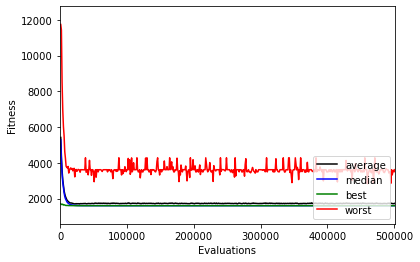

In [307]:
# Octava prueba: selección por torneo, cruce sbx, mutación gausiana, reemplazo generacional

# Hiperparámetros: seed = 123456789 N = 1000 Crossover_rate = 0.9 Mutation_rate = 0.1 y max_generations = 500

# Creamos un generador de números aleatorios y definimos una semilla.

rng = random.Random()
rng.seed(123456789)

# Definimos los operadores del algoritmo genético

ea = inspyred.ec.GA(rng)

ea.selector = inspyred.ec.selectors.tournament_selection # Selección por torneo

ea.variator = [inspyred.ec.variators.simulated_binary_crossover, # Cruce sbx
               inspyred.ec.variators.gaussian_mutation] # Mutación gausiana

ea.replacer = inspyred.ec.replacers.generational_replacement # Reemplazo generacional 

ea.terminator = inspyred.ec.terminators.generation_termination # Terminamos al llegar a 500 generaciones

ea.observer = [inspyred.ec.observers.stats_observer, # Nos devuelve las estadísticas por generación
               inspyred.ec.observers.plot_observer] # Muestra una gráfica de la evolución del fitness por generación

# Evolucionamos nuestra población

final_pop = ea.evolve(generator = generate_solution,
                      evaluator = func_fitness,
                      num_inputs = 4,
                      pop_size = 1000,
                      maximize = False,
                      bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                      tournament_size = 2,
                      max_generations = 500,
                      crossover_rate = 0.9,
                      mutation_rate = 0.1) 

# Ordenamos la población final y mostramos por pantalla la mejor solución y su valor de fitness

final_pop.sort(key = lambda x: x.fitness)
best_solution = final_pop[0].candidate
best_fitness = final_pop[0].fitness
print(f'Mejor Solución: {best_solution}, Valor Objetivo: {best_fitness}')

# Calculamos el valor de las reestricciones de nuestra mejor solución.

x1_c = final_pop[0].candidate[0]
x2_c = final_pop[0].candidate[1]
x3_c = final_pop[0].candidate[2]
x4_c = final_pop[0].candidate[3]
    
g1 = -x4_c + x3_c - 0.55 
g2 = -x3_c + x4_c - 0.55 
h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c    
h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

# Las mostramos por pantalla también

constraints_value = [g1, g2, h1, h2, h3]
print(f'Valor de las reestricciones: {constraints_value}')

# Calculamos el valor de la función para esa solución 

f_best_solution = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)
print(f'Valor de la función para la mejor solución: {f_best_solution}')

In [308]:
# De momento parece que estamos consiguiendo un valor de fitness bastante bajito, pero solo se estan cumpliendo 
# dos restricciones. h1, h2, h3 no se cumplen por mucho, están muy lejos del 0. Vamos a intentar el mínimo valor 
# posible de fitness intentando que se cumplan el máximo de reestricciones posibles. 

# Para esto, vamos a penalizar aún más que no se cumplan las restricciones h1, h2 y h3. Como parece que h1 y h2 
# tienden a un valor de 400 y h3 al doble, pues vamos a penalizar el doble h3 que h1 y h2.

def func_fitness_2 (candidates, args):
    
    fitness = []
    
    for individuo in candidates:
        
        x1_c = individuo[0]
        x2_c = individuo[1]
        x3_c = individuo[2]
        x4_c = individuo[3]
    
        # Función objetivo a minimizar:
    
        objective = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)

        # Restricciones:
    
        g1 = -x4_c + x3_c - 0.55 # Esta debe ser menor o igual que 0
        g2 = -x3_c + x4_c - 0.55 # Esta también, por eso no ponemos luego valor absoluto
    
        h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
        h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c
        h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

        # Penalizaciones por no cumplir con las restricciones, penalizando más h1, h2 y h3
    
        penalty = max(0, g1) + max(0, g2) + 2 * max(0, abs(h1)) + 2 * max(0, abs(h2)) + 4 * max(0, abs(h3))

        # Función de fitness
    
        fitness_value = objective + penalty
        
        fitness.append(fitness_value)
    
    return fitness


Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        100 15833.8753 3788.41642 8908.05842 8913.64495 3111.82313

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        200 16380.7363 3553.01542 6676.83550 7140.63344 2675.17704

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        300 16091.5061 3531.59897 5613.19519 6048.45138 2049.25102

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        400 9277.21017 3568.12891 5086.85637 5319.93486 1387.46585

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        37       3800 9563.21477 3458.38970 3464.25230 3916.02547 1183.04186

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        38       3900 8167.98866 3458.10932 3463.21125 3859.23911 1060.01883

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        39       4000 9450.42154 3458.10932 3463.30812 3862.74342 1072.95335

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        40       4100 8914.60662 3458.10932 3462.16637 3790.14023 863.731910

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        76       7700 7295.96069 3449.83481 3451.57541 3626.21899 584.123885

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        77       7800 7363.07622 3449.58301 3451.31132 3722.62742 690.756017

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        78       7900 8728.50646 3449.50985 3451.14634 3744.15284 873.373359

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        79       8000 6868.23875 3449.18201 3450.82250 3639.41004 601.376414

Generation Evaluation      Worst       Best     Median    Average    Std

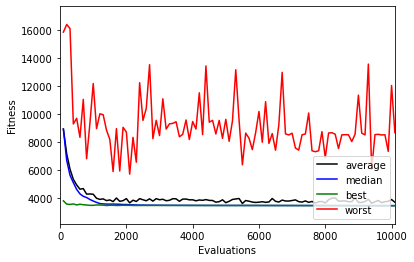

In [309]:
# Novena prueba: selección por torneo, cruce sbx, mutación gausiana, reemplazo generacional

# Hiperparámetros: seed = 123456789 N = 100 Crossover_rate = 0.9 Mutation_rate = 0.075

# Creamos un generador de números aleatorios y definimos una semilla.

rng = random.Random()
rng.seed(123456789)

# Definimos los operadores del algoritmo genético

ea = inspyred.ec.GA(rng)

ea.selector = inspyred.ec.selectors.tournament_selection # Selección por torneo

ea.variator = [inspyred.ec.variators.simulated_binary_crossover, # Cruce sbx
               inspyred.ec.variators.gaussian_mutation] # Mutación gausiana

ea.replacer = inspyred.ec.replacers.generational_replacement # Reemplazo generacional

ea.terminator = inspyred.ec.terminators.generation_termination # Terminamos al llegar a 100 generaciones

ea.observer = [inspyred.ec.observers.stats_observer, # Nos devuelve las estadísticas por generación
               inspyred.ec.observers.plot_observer] # Muestra una gráfica de la evolución del fitness por generación

# Evolucionamos nuestra población con nuestra función de fitness que penaliza más las restricciones h1, h2 y h3

final_pop = ea.evolve(generator = generate_solution,
                      evaluator = func_fitness_2,
                      num_inputs = 4,
                      pop_size = 100,
                      maximize = False,
                      bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                      tournament_size = 2,
                      max_generations = 100,
                      crossover_rate = 0.9,
                      mutation_rate = 0.075) 

# Ordenamos la población final y mostramos por pantalla la mejor solución y su valor de fitness

final_pop.sort(key = lambda x: x.fitness)
best_solution = final_pop[0].candidate
best_fitness = final_pop[0].fitness
print(f'Mejor Solución: {best_solution}, Valor Objetivo: {best_fitness}')

# Calculamos el valor de las reestricciones de nuestra mejor solución.

x1_c = final_pop[0].candidate[0]
x2_c = final_pop[0].candidate[1]
x3_c = final_pop[0].candidate[2]
x4_c = final_pop[0].candidate[3]
    
g1 = -x4_c + x3_c - 0.55 
g2 = -x3_c + x4_c - 0.55 
h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c    
h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

# Las mostramos por pantalla también

constraints_value = [g1, g2, h1, h2, h3]
print(f'Valor de las reestricciones: {constraints_value}')

# Calculamos el valor de la función para esa solución 

f_best_solution = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)
print(f'Valor de la función para la mejor solución: {f_best_solution}')

# Parece que hemos penalizado bien h3 pero no lo suficiente h1 y h2, vamos a penalizarlo de forma personalizada

In [310]:
def func_fitness_3 (candidates, args):
    
    fitness = []
    
    for individuo in candidates:
        
        x1_c = individuo[0]
        x2_c = individuo[1]
        x3_c = individuo[2]
        x4_c = individuo[3]
    
        # Función objetivo a minimizar:
    
        objective = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)

        # Restricciones:
    
        g1 = -x4_c + x3_c - 0.55 # Esta debe ser menor o igual que 0
        g2 = -x3_c + x4_c - 0.55 # Esta también, por eso no ponemos luego valor absoluto
    
        h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
        h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c
        h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

        # Penalizaciones por no cumplir con las restricciones, penalizando más h1, h2 y h3
    
        penalty = max(0, g1) + max(0, g2) + 11 * max(0, abs(h1)) + 10 * max(0, abs(h2)) + 100 * max(0, abs(h3))

        # Función de fitness
    
        fitness_value = objective + penalty
        
        fitness.append(fitness_value)
    
    return fitness

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        100 220385.266 13772.1237 102488.189 99596.7274 57099.0448

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        200 235317.073 9644.53964 59847.1169 71616.7713 48656.5397

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        300 248587.811 9643.77436 38273.8575 49670.0917 38015.9437

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        400 186249.495 10245.2579 31730.6876 39158.7324 26320.8860

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        41       4200 255865.103 5101.99998 5750.88179 15349.8039 35479.2775

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        42       4300 215628.179 5093.50840 5587.62943 17064.2732 37073.4636

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        43       4400 205972.146 5062.25516 5518.47035 15868.7616 35797.2762

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        44       4500 215791.600 5074.71882 5414.70740 14084.6054 33108.0852

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        80       8100 216078.741 5016.30737 5022.46899 24684.8203 52208.1079

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        81       8200 219472.206 5014.92043 5021.24533 19973.7037 44615.3805

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        82       8300 259844.442 5015.55624 5022.52496 24171.6730 47999.4995

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        83       8400 216076.035 5016.14743 5021.25037 12163.6130 26792.7375

Generation Evaluation      Worst       Best     Median    Average    Std

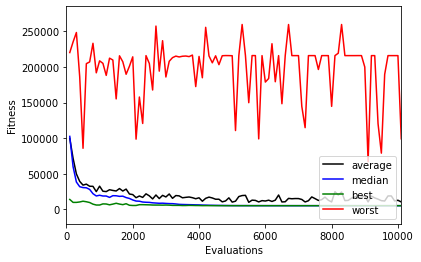

In [311]:
# Décima prueba: selección por torneo, cruce sbx, mutación gausiana, reemplazo generacional

# Hiperparámetros: seed = 123456789 N = 100 Crossover_rate = 0.9 Mutation_rate = 0.075

# Creamos un generador de números aleatorios y definimos una semilla.

rng = random.Random()
rng.seed(123456789)

# Definimos los operadores del algoritmo genético

ea = inspyred.ec.GA(rng)

ea.selector = inspyred.ec.selectors.tournament_selection # Selección por torneo

ea.variator = [inspyred.ec.variators.simulated_binary_crossover, # Cruce sbx
               inspyred.ec.variators.gaussian_mutation] # Mutación gausiana

ea.replacer = inspyred.ec.replacers.generational_replacement # Reemplazo generacional

ea.terminator = inspyred.ec.terminators.generation_termination # Terminamos al llegar a 100 generaciones

ea.observer = [inspyred.ec.observers.stats_observer, # Nos devuelve las estadísticas por generación
               inspyred.ec.observers.plot_observer] # Muestra una gráfica de la evolución del fitness por generación

# Evolucionamos nuestra población con otra función de fitness que penaliza aún más las restricciones h1, h2 y h3

final_pop = ea.evolve(generator = generate_solution,
                      evaluator = func_fitness_3,
                      num_inputs = 4,
                      pop_size = 100,
                      maximize = False,
                      bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                      tournament_size = 2,
                      max_generations = 100,
                      crossover_rate = 0.9,
                      mutation_rate = 0.075) 

# Ordenamos la población final y mostramos por pantalla la mejor solución y su valor de fitness

final_pop.sort(key = lambda x: x.fitness)
best_solution = final_pop[0].candidate
best_fitness = final_pop[0].fitness
print(f'Mejor Solución: {best_solution}, Valor Objetivo: {best_fitness}')

# Calculamos el valor de las reestricciones de nuestra mejor solución.

x1_c = final_pop[0].candidate[0]
x2_c = final_pop[0].candidate[1]
x3_c = final_pop[0].candidate[2]
x4_c = final_pop[0].candidate[3]
    
g1 = -x4_c + x3_c - 0.55 
g2 = -x3_c + x4_c - 0.55 
h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c    
h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

# Las mostramos por pantalla también

constraints_value = [g1, g2, h1, h2, h3]
print(f'Valor de las reestricciones: {constraints_value}')

# Calculamos el valor de la función para esa solución 

f_best_solution = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)
print(f'Valor de la función para la mejor solución: {f_best_solution}')

# Hemos conseguido que se cumplan practicamente todas las restricciones pero el mejor fitness es muy malo
# Intentemos minimizarlo al máximo

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        100 220385.266 13772.1237 102488.189 99596.7274 57099.0448

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        200 233829.691 14589.0113 55785.8921 74287.8756 53839.8830

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        300 184001.756 12617.8835 34978.4397 44525.7930 30531.2416

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        400 248246.456 13233.5195 30694.5557 41232.0445 37597.2670

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        38       3900 258201.232 4599.55957 4812.71614 17580.0358 42483.4803

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        39       4000 197348.496 4544.27980 4794.64096 17376.4762 40061.4199

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        40       4100 197411.121 4585.23192 4788.28831 13527.9297 27682.1552

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        41       4200 197367.375 4561.76539 4761.26420 17795.4351 39670.2680

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        74       7500 42487.0909 4465.87193 4484.03685 8615.27978 9873.87730

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        75       7600 197607.079 4464.72152 4483.48021 17540.5735 35856.8005

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        76       7700 182405.948 4464.60435 4482.82676 12959.5234 24763.5789

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        77       7800 197631.646 4466.64347 4479.20831 15879.9650 34276.4840

Generation Evaluation      Worst       Best     Median    Average    Std

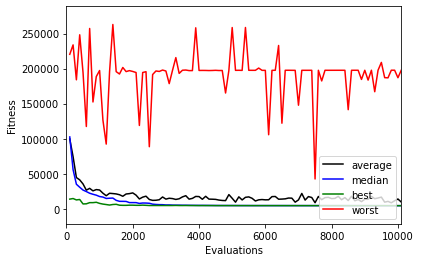

In [312]:
# Undécima prueba: selección por rank, cruce sbx, mutación gausiana, reemplazo generacional

# Hiperparámetros: seed = 123456789 N = 100 Crossover_rate = 0.9 Mutation_rate = 0.075

# Creamos un generador de números aleatorios y definimos una semilla.

rng = random.Random()
rng.seed(123456789)

# Definimos los operadores del algoritmo genético

ea = inspyred.ec.GA(rng)

ea.selector = inspyred.ec.selectors.rank_selection # Selección por rank

ea.variator = [inspyred.ec.variators.simulated_binary_crossover, # Cruce sbx
               inspyred.ec.variators.gaussian_mutation] # Mutación gausiana

ea.replacer = inspyred.ec.replacers.generational_replacement # Reemplazo generacional

ea.terminator = inspyred.ec.terminators.generation_termination # Terminamos al llegar a 100 generaciones

ea.observer = [inspyred.ec.observers.stats_observer, # Nos devuelve las estadísticas por generación
               inspyred.ec.observers.plot_observer] # Muestra una gráfica de la evolución del fitness por generación

# Evolucionamos nuestra población con otra función de fitness que penaliza aún más las restricciones h1, h2 y h3

final_pop = ea.evolve(generator = generate_solution,
                      evaluator = func_fitness_3,
                      num_inputs = 4,
                      pop_size = 100,
                      maximize = False,
                      bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                      max_generations = 100,
                      crossover_rate = 0.9,
                      mutation_rate = 0.075) 

# Ordenamos la población final y mostramos por pantalla la mejor solución y su valor de fitness

final_pop.sort(key = lambda x: x.fitness)
best_solution = final_pop[0].candidate
best_fitness = final_pop[0].fitness
print(f'Mejor Solución: {best_solution}, Valor Objetivo: {best_fitness}')

# Calculamos el valor de las reestricciones de nuestra mejor solución.

x1_c = final_pop[0].candidate[0]
x2_c = final_pop[0].candidate[1]
x3_c = final_pop[0].candidate[2]
x4_c = final_pop[0].candidate[3]
    
g1 = -x4_c + x3_c - 0.55 
g2 = -x3_c + x4_c - 0.55 
h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c    
h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

# Las mostramos por pantalla también

constraints_value = [g1, g2, h1, h2, h3]
print(f'Valor de las reestricciones: {constraints_value}')

# Calculamos el valor de la función para esa solución 

f_best_solution = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)
print(f'Valor de la función para la mejor solución: {f_best_solution}')

# Ha mejorado bastante, sigamos

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        100 220385.266 13772.1237 102488.189 99596.7274 57099.0448

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        200 225253.377 9550.81263 58212.2629 77685.6987 55656.7528

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        300 209326.283 9550.81263 37433.3504 52225.5038 40000.6709

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        400 183909.338 9550.81263 29304.2692 38814.6330 29112.7737

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        42       4300 196932.662 4640.85037 4900.63496 16005.2326 31212.8195

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        43       4400 196827.369 4616.45867 4828.31840 13322.8406 30479.4819

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        44       4500 259066.715 4592.73209 4787.46635 11395.5457 28404.5711

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        45       4600 196121.281 4563.76844 4755.79359 15533.2712 34040.0068

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        80       8100 188072.859 4406.04818 4449.31421 14748.4680 30498.3719

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        81       8200 196439.846 4405.04620 4448.78955 19589.4595 41183.0561

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        82       8300 196463.731 4401.81476 4445.36844 13483.2396 28674.9025

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        83       8400 196457.736 4402.21900 4440.40636 13579.4008 32615.0211

Generation Evaluation      Worst       Best     Median    Average    Std

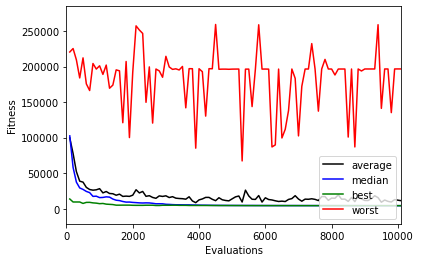

In [313]:
# Duodécima prueba: selección por rank, cruce sbx, mutación gausiana, reemplazo generacional

# Hiperparámetros: seed = 123456789 N = 100 Crossover_rate = 0.6 Mutation_rate = 0.075

# Creamos un generador de números aleatorios y definimos una semilla.

rng = random.Random()
rng.seed(123456789)

# Definimos los operadores del algoritmo genético

ea = inspyred.ec.GA(rng)

ea.selector = inspyred.ec.selectors.rank_selection # Selección por torneo

ea.variator = [inspyred.ec.variators.simulated_binary_crossover, # Cruce sbx
               inspyred.ec.variators.gaussian_mutation] # Mutación gausiana

ea.replacer = inspyred.ec.replacers.generational_replacement # Reemplazo generacional

ea.terminator = inspyred.ec.terminators.generation_termination # Terminamos al llegar a 100 generaciones

ea.observer = [inspyred.ec.observers.stats_observer, # Nos devuelve las estadísticas por generación
               inspyred.ec.observers.plot_observer] # Muestra una gráfica de la evolución del fitness por generación

# Evolucionamos nuestra población con otra función de fitness que penaliza aún más las restricciones h1, h2 y h3

final_pop = ea.evolve(generator = generate_solution,
                      evaluator = func_fitness_3,
                      num_inputs = 4,
                      pop_size = 100,
                      maximize = False,
                      bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                      max_generations = 100,
                      crossover_rate = 0.6,
                      mutation_rate = 0.075) 

# Ordenamos la población final y mostramos por pantalla la mejor solución y su valor de fitness

final_pop.sort(key = lambda x: x.fitness)
best_solution = final_pop[0].candidate
best_fitness = final_pop[0].fitness
print(f'Mejor Solución: {best_solution}, Valor Objetivo: {best_fitness}')

# Calculamos el valor de las reestricciones de nuestra mejor solución.

x1_c = final_pop[0].candidate[0]
x2_c = final_pop[0].candidate[1]
x3_c = final_pop[0].candidate[2]
x4_c = final_pop[0].candidate[3]
    
g1 = -x4_c + x3_c - 0.55 
g2 = -x3_c + x4_c - 0.55 
h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c    
h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

# Las mostramos por pantalla también

constraints_value = [g1, g2, h1, h2, h3]
print(f'Valor de las reestricciones: {constraints_value}')

# Calculamos el valor de la función para esa solución 

f_best_solution = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)
print(f'Valor de la función para la mejor solución: {f_best_solution}')

# Aún mejor

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        100 220385.266 13772.1237 102488.189 99596.7274 57099.0448

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        200 79378.7980 9550.81263 33087.9802 38849.6560 18099.5904

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        300 29366.0699 9212.48338 23474.3350 22227.3800 5351.84585

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        400 23827.1842 8541.46733 18099.5212 17685.9279 3902.56632

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        39       4000 4459.20004 4440.06176 4454.90617 4453.74553 4.63946435

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        40       4100 4454.50271 4431.38798 4449.93447 4448.79019 4.89070871

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        41       4200 4449.92032 4429.18303 4444.06337 4444.18243 4.18241744

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        42       4300 4443.02545 4429.18303 4441.39372 4440.08559 3.03285733

Generation Evaluation      Worst       Best     Median    Average    Std

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        76       7700 4420.16113 4420.13419 4420.15745 4420.15448 0.00621517

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        77       7800 4420.15714 4420.12831 4420.14961 4420.14861 0.00618955

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        78       7900 4420.14892 4420.12739 4420.14289 4420.14248 0.00459411

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
        79       8000 4420.14289 4420.12739 4420.13874 4420.13839 0.00347215

Generation Evaluation      Worst       Best     Median    Average    Std

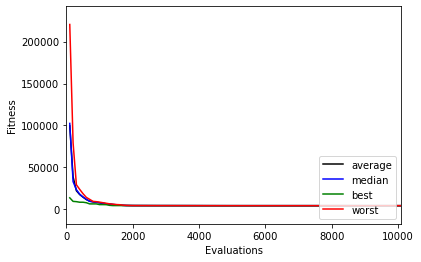

In [314]:
# Decimotercera prueba: selección por rank, cruce sbx, mutación gausiana, reemplazo por truncamiento

# Hiperparámetros: seed = 123456789 N = 100 Crossover_rate = 0.6 Mutation_rate = 0.075

# Creamos un generador de números aleatorios y definimos una semilla.

rng = random.Random()
rng.seed(123456789)

# Definimos los operadores del algoritmo genético

ea = inspyred.ec.GA(rng)

ea.selector = inspyred.ec.selectors.rank_selection # Selección por rank

ea.variator = [inspyred.ec.variators.simulated_binary_crossover, # Cruce sbx
               inspyred.ec.variators.gaussian_mutation] # Mutación gausiana

ea.replacer = inspyred.ec.replacers.truncation_replacement # Reemplazo por truncamiento

ea.terminator = inspyred.ec.terminators.generation_termination # Terminamos al llegar a 100 generaciones

ea.observer = [inspyred.ec.observers.stats_observer, # Nos devuelve las estadísticas por generación
               inspyred.ec.observers.plot_observer] # Muestra una gráfica de la evolución del fitness por generación

# Evolucionamos nuestra población con otra función de fitness que penaliza aún más las restricciones h1, h2 y h3

final_pop = ea.evolve(generator = generate_solution,
                      evaluator = func_fitness_3,
                      num_inputs = 4,
                      pop_size = 100,
                      maximize = False,
                      bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                      max_generations = 100,
                      crossover_rate = 0.6,
                      mutation_rate = 0.075) 

# Ordenamos la población final y mostramos por pantalla la mejor solución y su valor de fitness

final_pop.sort(key = lambda x: x.fitness)
best_solution = final_pop[0].candidate
best_fitness = final_pop[0].fitness
print(f'Mejor Solución: {best_solution}, Valor Objetivo: {best_fitness}')

# Calculamos el valor de las reestricciones de nuestra mejor solución.

x1_c = final_pop[0].candidate[0]
x2_c = final_pop[0].candidate[1]
x3_c = final_pop[0].candidate[2]
x4_c = final_pop[0].candidate[3]
    
g1 = -x4_c + x3_c - 0.55 
g2 = -x3_c + x4_c - 0.55 
h1 = 1000 * np.sin(-x3_c - 0.25) + 1000 * np.sin(-x4_c - 0.25) + 894.8 - x1_c
h2 = 1000 * np.sin(x3_c - 0.25) + 1000 * np.sin(x3_c - x4_c - 0.25) + 894.8 - x2_c    
h3 = 1000 * np.sin(x4_c - 0.25) + 1000 * np.sin(x4_c - x3_c - 0.25) + 1294.8

# Las mostramos por pantalla también

constraints_value = [g1, g2, h1, h2, h3]
print(f'Valor de las reestricciones: {constraints_value}')

# Calculamos el valor de la función para esa solución 

f_best_solution = 3 * x1_c + 0.000001 * x1_c**3 + 2 * x2_c + 0.000002 / (3 * x2_c**3)
print(f'Valor de la función para la mejor solución: {f_best_solution}')

# No mejoramos, pero se cumplen muy bien las restricciones
# Se han probado bastantes más combinaciones y no hemos conseguido bajar de aproximadamente 4300 de fitness 
# cumpliendo todas las restricciones

In [359]:
# Bueno, de momento hemos llegado a una conclusión, parece que la mejor solución cumpliendo las 5 restricciones
# se encuentra entorno a valor de 4420.13 

# Vamos a hacer realizar un experimento para tener una buena muestra estadística.
# Usaremos los operadores que mejores resultados me han dado

# Primer tipo de experimentos:

def exps_type_1(seed, mutation_rate, crossover_rate):
    
    rng = random.Random()
    rng.seed(seed)
    
    ea = inspyred.ec.GA(rng)
    
    ea.selector = inspyred.ec.selectors.rank_selection
    
    ea.variator = [inspyred.ec.variators.simulated_binary_crossover,
                  inspyred.ec.variators.gaussian_mutation]
    
    ea.replacer = inspyred.ec.replacers.truncation_replacement
    
    ea.terminator = inspyred.ec.terminators.generation_termination
    
    final_pop = ea.evolve(generator = generate_solution,
                          evaluator = func_fitness_3, # Usamos la que nos ha permitido cumplir todas las constrains
                          num_inputs = 4,
                          pop_size = 100,
                          maximize = False,
                          bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                          max_generations = 100,
                          crossover_rate = crossover_rate,
                          mutation_rate = mutation_rate)
    
    final_pop.sort(key=lambda x: x.fitness)
    
    return final_pop[0]

# Experimentamos con diferentes mutation_rate y crossover_rate

start_time = time.time()

results_1 = []
results_2 = []

seed = 123456789

for i in range(31):  # Mínimo 30 experimentos
    
    best_1 = exps_type_1(seed + i*71, 0.1, 1)   # Primera combinación
    results_1.append(best_1.fitness)
    
    best_2 = exps_type_1(seed + i*71, 0.075, 0.6)  # Segunda combinación
    results_2.append(best_2.fitness)
    
end_time = time.time()

# Calculamos media y desviación estándar de ambos experimentos

mean_1, std_1 = np.mean(results_1), np.std(results_1)
mean_2, std_2 = np.mean(results_2), np.std(results_2)

total_time = end_time - start_time

print(f"31 experimentos con Mutation Rate = 0.1, Crossover Rate = 1: Mean = {mean_1}, Std = {std_1}")
print(f"31 experimentos con Mutation Rate = 0.075, Crossover Rate = 0.6: Mean = {mean_2}, Std = {std_2}")
print(f"El tiempo total para los 31 experimentos fue de {total_time:.2f} segundos")

# Hacemos test de significancia estadística

w, p = wilcoxon(results_1, results_2)
print(f"Wilcoxon signed-rank test: W = {w}, p-value = {p}")

31 experimentos con Mutation Rate = 0.1, Crossover Rate = 1: Mean = 4666.523689437553, Std = 497.13838284754087
31 experimentos con Mutation Rate = 0.075, Crossover Rate = 0.6: Mean = 4886.726904939873, Std = 586.7376026081357
El tiempo total para los 31 experimentos fue de 21.06 segundos
Wilcoxon signed-rank test: W = 169.0, p-value = 0.12159170861709065


In [361]:
# Segundo tipo de experimentos: cambiamos selectores y reemplazo

def exps_type_2(seed, mutation_rate, crossover_rate):
    
    rng = random.Random()
    rng.seed(seed)
    
    ea = inspyred.ec.GA(rng)
    
    ea.selector = inspyred.ec.selectors.tournament_selection
    
    ea.variator = [inspyred.ec.variators.simulated_binary_crossover,
                  inspyred.ec.variators.gaussian_mutation]
    
    ea.replacer = inspyred.ec.replacers.generational_replacement
    
    ea.terminator = inspyred.ec.terminators.generation_termination
    
    final_pop = ea.evolve(generator = generate_solution,
                          evaluator = func_fitness_3, # Usamos la que nos ha permitido cumplir todas las constrains
                          num_inputs = 4,
                          pop_size = 100,
                          maximize = False,
                          bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                          tournament_size = 2,
                          max_generations = 100,
                          crossover_rate = crossover_rate,
                          mutation_rate = mutation_rate)
    
    final_pop.sort(key=lambda x: x.fitness)
    
    return final_pop[0]

# Experimentamos con diferentes mutation_rate y crossover_rate

start_time = time.time()

results_1 = []
results_2 = []

seed = 123456789

for i in range(31):  # Mínimo 30 experimentos
    
    best_1 = exps_type_2(seed + i*71, 0.1, 1)   # Primera combinación
    results_1.append(best_1.fitness)
    
    best_2 = exps_type_2(seed + i*71, 0.075, 0.6)  # Segunda combinación
    results_2.append(best_2.fitness)

end_time = time.time()
    
# Calculamos media y desviación estándar de ambos experimentos

mean_1, std_1 = np.mean(results_1), np.std(results_1)
mean_2, std_2 = np.mean(results_2), np.std(results_2)

total_time = end_time - start_time

print(f"31 experimentos con Mutation Rate = 0.1, Crossover Rate = 1: Mean = {mean_1}, Std = {std_1}")
print(f"31 experimentos con Mutation Rate = 0.075, Crossover Rate = 0.6: Mean = {mean_2}, Std = {std_2}")
print(f"El tiempo total para los 31 experimentos fue de {total_time:.2f} segundos")

# Hacemos test de significancia estadística

w, p = wilcoxon(results_1, results_2)
print(f"Wilcoxon signed-rank test: W = {w}, p-value = {p}")

31 experimentos con Mutation Rate = 0.1, Crossover Rate = 1: Mean = 5003.338641418894, Std = 647.8206659289714
31 experimentos con Mutation Rate = 0.075, Crossover Rate = 0.6: Mean = 5429.161732547305, Std = 916.6807292398453
El tiempo total para los 31 experimentos fue de 21.45 segundos
Wilcoxon signed-rank test: W = 135.0, p-value = 0.02680061581738834


In [362]:
# Tercer tipo de experimentos: cambiamos hiperparámetros y selectores y reemplazos de nuevo

def exps_type_3(seed, mutation_rate, crossover_rate):
    
    rng = random.Random()
    rng.seed(seed)
    
    ea = inspyred.ec.GA(rng)
    
    ea.selector = inspyred.ec.selectors.rank_selection
    
    ea.variator = [inspyred.ec.variators.simulated_binary_crossover,
                  inspyred.ec.variators.gaussian_mutation]
    
    ea.replacer = inspyred.ec.replacers.truncation_replacement
    
    ea.terminator = inspyred.ec.terminators.generation_termination
    
    final_pop = ea.evolve(generator = generate_solution,
                          evaluator = func_fitness_3, # Usamos la que nos ha permitido cumplir todas las constrains
                          num_inputs = 4,
                          pop_size = 100,
                          maximize = False,
                          bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                          max_generations = 100,
                          crossover_rate = crossover_rate,
                          mutation_rate = mutation_rate)
    
    final_pop.sort(key=lambda x: x.fitness)
    
    return final_pop[0]

# Experimentamos con diferentes mutation_rate y crossover_rate

start_time = time.time()

results_1 = []
results_2 = []

seed = 123456789

for i in range(31):  # Mínimo 30 experimentos
    
    best_1 = exps_type_3(seed + i*71, 0.1, 0.6)   # Primera combinación
    results_1.append(best_1.fitness)
    
    best_2 = exps_type_3(seed + i*71, 0.1, 0.9)  # Segunda combinación
    results_2.append(best_2.fitness)

end_time = time.time()
    
# Calculamos media y desviación estándar de ambos experimentos

mean_1, std_1 = np.mean(results_1), np.std(results_1)
mean_2, std_2 = np.mean(results_2), np.std(results_2)

total_time = end_time - start_time

print(f"31 experimentos con Mutation Rate = 0.1, Crossover Rate = 0.6: Mean = {mean_1}, Std = {std_1}")
print(f"31 experimentos con Mutation Rate = 0.1, Crossover Rate = 0.9: Mean = {mean_2}, Std = {std_2}")
print(f"El tiempo total para los 31 experimentos fue de {total_time:.2f} segundos")

# Hacemos test de significancia estadística

w, p = wilcoxon(results_1, results_2)
print(f"Wilcoxon signed-rank test: W = {w}, p-value = {p}")

31 experimentos con Mutation Rate = 0.1, Crossover Rate = 0.6: Mean = 4945.522124469399, Std = 681.2590095679424
31 experimentos con Mutation Rate = 0.1, Crossover Rate = 0.9: Mean = 4599.878795223624, Std = 411.5015502458715
El tiempo total para los 31 experimentos fue de 21.78 segundos
Wilcoxon signed-rank test: W = 141.0, p-value = 0.03600859859991775


In [363]:
# Cuarto tipo de experimentos: 

def exps_type_4(seed, mutation_rate, crossover_rate):
    
    rng = random.Random()
    rng.seed(seed)
    
    ea = inspyred.ec.GA(rng)
    
    ea.selector = inspyred.ec.selectors.rank_selection
    
    ea.variator = [inspyred.ec.variators.simulated_binary_crossover,
                  inspyred.ec.variators.gaussian_mutation]
    
    ea.replacer = inspyred.ec.replacers.truncation_replacement
    
    ea.terminator = inspyred.ec.terminators.generation_termination
    
    final_pop = ea.evolve(generator = generate_solution,
                          evaluator = func_fitness_3, # Usamos la que nos ha permitido cumplir todas las constrains
                          num_inputs = 4,
                          pop_size = 100,
                          maximize = False,
                          bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                          max_generations = 100,
                          crossover_rate = crossover_rate,
                          mutation_rate = mutation_rate)
    
    final_pop.sort(key=lambda x: x.fitness)
    
    return final_pop[0]

# Experimentamos con diferentes mutation_rate y crossover_rate

start_time = time.time()

results_1 = []
results_2 = []

seed = 123456789

for i in range(31):  # Mínimo 30 experimentos
    
    best_1 = exps_type_4(seed + i*71, 0.01, 0.9)   # Primera combinación
    results_1.append(best_1.fitness)
    
    best_2 = exps_type_4(seed + i*71, 0.075, 1)  # Segunda combinación
    results_2.append(best_2.fitness)

end_time = time.time()
    
# Calculamos media y desviación estándar de ambos experimentos

mean_1, std_1 = np.mean(results_1), np.std(results_1)
mean_2, std_2 = np.mean(results_2), np.std(results_2)

total_time = end_time - start_time

print(f"31 experimentos con Mutation Rate = 0.01, Crossover Rate = 0.9: Mean = {mean_1}, Std = {std_1}")
print(f"31 experimentos con Mutation Rate = 0.075, Crossover Rate = 1: Mean = {mean_2}, Std = {std_2}")
print(f"El tiempo total para los 31 experimentos fue de {total_time:.2f} segundos")

# Hacemos test de significancia estadística

w, p = wilcoxon(results_1, results_2)
print(f"Wilcoxon signed-rank test: W = {w}, p-value = {p}")

31 experimentos con Mutation Rate = 0.01, Crossover Rate = 0.9: Mean = 4588.885866016303, Std = 498.66111308759156
31 experimentos con Mutation Rate = 0.075, Crossover Rate = 1: Mean = 4661.78545758878, Std = 545.733542060315
El tiempo total para los 31 experimentos fue de 23.88 segundos
Wilcoxon signed-rank test: W = 234.0, p-value = 0.7838144105315151


In [365]:
# Quinto tipo de experimentos:

def exps_type_5(seed, mutation_rate, crossover_rate):
    
    rng = random.Random()
    rng.seed(seed)
    
    ea = inspyred.ec.GA(rng)
    
    ea.selector = inspyred.ec.selectors.rank_selection
    
    ea.variator = [inspyred.ec.variators.simulated_binary_crossover,
                  inspyred.ec.variators.gaussian_mutation]
    
    ea.replacer = inspyred.ec.replacers.generational_replacement
    
    ea.terminator = inspyred.ec.terminators.generation_termination
    
    final_pop = ea.evolve(generator = generate_solution,
                          evaluator = func_fitness_3, # Usamos la que nos ha permitido cumplir todas las constrains
                          num_inputs = 4,
                          pop_size = 100,
                          maximize = False,
                          bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                          max_generations = 100,
                          crossover_rate = crossover_rate,
                          mutation_rate = mutation_rate)
    
    final_pop.sort(key=lambda x: x.fitness)
    
    return final_pop[0]

# Experimentamos con diferentes mutation_rate y crossover_rate

start_time = time.time()

results_1 = []
results_2 = []

seed = 123456789

for i in range(31):  # Mínimo 30 experimentos
    
    best_1 = exps_type_5(seed + i*71, 0.01, 0.9)   # Primera combinación
    results_1.append(best_1.fitness)
    
    best_2 = exps_type_5(seed + i*71, 0.1, 0.7)  # Segunda combinación
    results_2.append(best_2.fitness)

end_time = time.time()
    
# Calculamos media y desviación estándar de ambos experimentos

mean_1, std_1 = np.mean(results_1), np.std(results_1)
mean_2, std_2 = np.mean(results_2), np.std(results_2)
total_time = end_time - start_time

print(f"31 experimentos con Mutation Rate = 0.01, Crossover Rate = 0.9: Mean = {mean_1}, Std = {std_1}")
print(f"31 experimentos con Mutation Rate = 0.1, Crossover Rate = 0.7: Mean = {mean_2}, Std = {std_2}")
print(f"El tiempo total para los 31 experimentos fue de {total_time:.2f} segundos")

# Hacemos test de significancia estadística

w, p = wilcoxon(results_1, results_2)
print(f"Wilcoxon signed-rank test: W = {w}, p-value = {p}")

31 experimentos con Mutation Rate = 0.01, Crossover Rate = 0.9: Mean = 4888.261501034467, Std = 707.1708401627358
31 experimentos con Mutation Rate = 0.1, Crossover Rate = 0.7: Mean = 5089.698271236425, Std = 794.209901568907
El tiempo total para los 31 experimentos fue de 20.52 segundos
Wilcoxon signed-rank test: W = 189.0, p-value = 0.2476009312007299


In [367]:
# Sexto tipo de experimentos:

def exps_type_6(seed, mutation_rate, crossover_rate):
    
    rng = random.Random()
    rng.seed(seed)
    
    ea = inspyred.ec.GA(rng)
    
    ea.selector = inspyred.ec.selectors.tournament_selection
    
    ea.variator = [inspyred.ec.variators.simulated_binary_crossover,
                  inspyred.ec.variators.gaussian_mutation]
    
    ea.replacer = inspyred.ec.replacers.truncation_replacement
    
    ea.terminator = inspyred.ec.terminators.generation_termination
    
    final_pop = ea.evolve(generator = generate_solution,
                          evaluator = func_fitness_3, # Usamos la que nos ha permitido cumplir todas las constrains
                          num_inputs = 4,
                          pop_size = 100,
                          maximize = False,
                          bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                          tournament_size = 2,
                          max_generations = 100,
                          crossover_rate = crossover_rate,
                          mutation_rate = mutation_rate)
    
    final_pop.sort(key=lambda x: x.fitness)
    
    return final_pop[0]

# Experimentamos con diferentes mutation_rate y crossover_rate

start_time = time.time()

results_1 = []
results_2 = []

seed = 123456789

for i in range(31):  # Mínimo 30 experimentos
    
    best_1 = exps_type_6(seed + i*71, 0.01, 1)   # Primera combinación
    results_1.append(best_1.fitness)
    
    best_2 = exps_type_6(seed + i*71, 0.1, 0.7)  # Segunda combinación
    results_2.append(best_2.fitness)

end_time = time.time()
    
# Calculamos media y desviación estándar de ambos experimentos

mean_1, std_1 = np.mean(results_1), np.std(results_1)
mean_2, std_2 = np.mean(results_2), np.std(results_2)
total_time = end_time - start_time

print(f"31 experimentos con Mutation Rate = 0.01, Crossover Rate = 1: Mean = {mean_1}, Std = {std_1}")
print(f"31 experimentos con Mutation Rate = 0.1, Crossover Rate = 0.7: Mean = {mean_2}, Std = {std_2}")
print(f"El tiempo total para los 31 experimentos fue de {total_time:.2f} segundos")

# Hacemos test de significancia estadística

w, p = wilcoxon(results_1, results_2)
print(f"Wilcoxon signed-rank test: W = {w}, p-value = {p}")

31 experimentos con Mutation Rate = 0.01, Crossover Rate = 1: Mean = 4534.578765324859, Std = 316.89800965995585
31 experimentos con Mutation Rate = 0.1, Crossover Rate = 0.7: Mean = 4902.748925742924, Std = 632.7325564974642
El tiempo total para los 31 experimentos fue de 18.86 segundos
Wilcoxon signed-rank test: W = 97.0, p-value = 0.003085606886162517


In [368]:
# Septimo tipo de experimentos:

def exps_type_7(seed, mutation_rate, crossover_rate):
    
    rng = random.Random()
    rng.seed(seed)
    
    ea = inspyred.ec.GA(rng)
    
    ea.selector = inspyred.ec.selectors.tournament_selection
    
    ea.variator = [inspyred.ec.variators.simulated_binary_crossover,
                  inspyred.ec.variators.gaussian_mutation]
    
    ea.replacer = inspyred.ec.replacers.truncation_replacement
    
    ea.terminator = inspyred.ec.terminators.generation_termination
    
    final_pop = ea.evolve(generator = generate_solution,
                          evaluator = func_fitness_3, # Usamos la que nos ha permitido cumplir todas las constrains
                          num_inputs = 4,
                          pop_size = 100,
                          maximize = False,
                          bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                          tournament_size = 2,
                          max_generations = 100,
                          crossover_rate = crossover_rate,
                          mutation_rate = mutation_rate)
    
    final_pop.sort(key=lambda x: x.fitness)
    
    return final_pop[0]

# Experimentamos con diferentes mutation_rate y crossover_rate

start_time = time.time()

results_1 = []
results_2 = []

seed = 123456789

for i in range(31):  # Mínimo 30 experimentos
    
    best_1 = exps_type_7(seed + i*71, 0.01, 0.7)   # Primera combinación
    results_1.append(best_1.fitness)
    
    best_2 = exps_type_7(seed + i*71, 0.1, 1)  # Segunda combinación
    results_2.append(best_2.fitness)

end_time = time.time()
    
# Calculamos media y desviación estándar de ambos experimentos

mean_1, std_1 = np.mean(results_1), np.std(results_1)
mean_2, std_2 = np.mean(results_2), np.std(results_2)
total_time = end_time - start_time

print(f"31 experimentos con Mutation Rate = 0.01, Crossover Rate = 0.7: Mean = {mean_1}, Std = {std_1}")
print(f"31 experimentos con Mutation Rate = 0.1, Crossover Rate = 0.1: Mean = {mean_2}, Std = {std_2}")
print(f"El tiempo total para los 31 experimentos fue de {total_time:.2f} segundos")

# Hacemos test de significancia estadística

w, p = wilcoxon(results_1, results_2)
print(f"Wilcoxon signed-rank test: W = {w}, p-value = {p}")

31 experimentos con Mutation Rate = 0.01, Crossover Rate = 1: Mean = 4835.468990765965, Std = 545.8169016683195
31 experimentos con Mutation Rate = 0.1, Crossover Rate = 0.7: Mean = 4668.0103989265335, Std = 523.4854432095128
El tiempo total para los 31 experimentos fue de 19.88 segundos
Wilcoxon signed-rank test: W = 170.0, p-value = 0.12638087355671035


In [369]:
# Octavo tipo de experimentos:

def exps_type_8(seed, mutation_rate, crossover_rate):
    
    rng = random.Random()
    rng.seed(seed)
    
    ea = inspyred.ec.GA(rng)
    
    ea.selector = inspyred.ec.selectors.tournament_selection
    
    ea.variator = [inspyred.ec.variators.simulated_binary_crossover,
                  inspyred.ec.variators.gaussian_mutation]
    
    ea.replacer = inspyred.ec.replacers.truncation_replacement
    
    ea.terminator = inspyred.ec.terminators.generation_termination
    
    final_pop = ea.evolve(generator = generate_solution,
                          evaluator = func_fitness_3, # Usamos la que nos ha permitido cumplir todas las constrains
                          num_inputs = 4,
                          pop_size = 100,
                          maximize = False,
                          bounder = inspyred.ec.Bounder([0, 0.001, -0.55, -0.55], [1200, 1200, 0.55, 0.55]),
                          tournament_size = 2,
                          max_generations = 100,
                          crossover_rate = crossover_rate,
                          mutation_rate = mutation_rate)
    
    final_pop.sort(key=lambda x: x.fitness)
    
    return final_pop[0]

# Experimentamos con diferentes mutation_rate y crossover_rate

start_time = time.time()

results_1 = []
results_2 = []

seed = 123456789

for i in range(31):  # Mínimo 30 experimentos
    
    best_1 = exps_type_8(seed + i*71, 0.01, 0.6)   # Primera combinación
    results_1.append(best_1.fitness)
    
    best_2 = exps_type_8(seed + i*71, 0.1, 0.6)  # Segunda combinación
    results_2.append(best_2.fitness)

end_time = time.time()
    
# Calculamos media y desviación estándar de ambos experimentos

mean_1, std_1 = np.mean(results_1), np.std(results_1)
mean_2, std_2 = np.mean(results_2), np.std(results_2)
total_time = end_time - start_time

print(f"31 experimentos con Mutation Rate = 0.01, Crossover Rate = 0.6: Mean = {mean_1}, Std = {std_1}")
print(f"31 experimentos con Mutation Rate = 0.1, Crossover Rate = 0.6: Mean = {mean_2}, Std = {std_2}")
print(f"El tiempo total para los 31 experimentos fue de {total_time:.2f} segundos")

# Hacemos test de significancia estadística

w, p = wilcoxon(results_1, results_2)
print(f"Wilcoxon signed-rank test: W = {w}, p-value = {p}")

31 experimentos con Mutation Rate = 0.01, Crossover Rate = 1: Mean = 4985.778571759129, Std = 718.5592281657222
31 experimentos con Mutation Rate = 0.1, Crossover Rate = 0.7: Mean = 4774.485208533369, Std = 515.2436942480033
El tiempo total para los 31 experimentos fue de 20.87 segundos
Wilcoxon signed-rank test: W = 197.0, p-value = 0.317589436651994
